На сликата подолу е прикажан дел од ЕР дијаграм за организација на универзитети и мобилност на студенти и вработени.

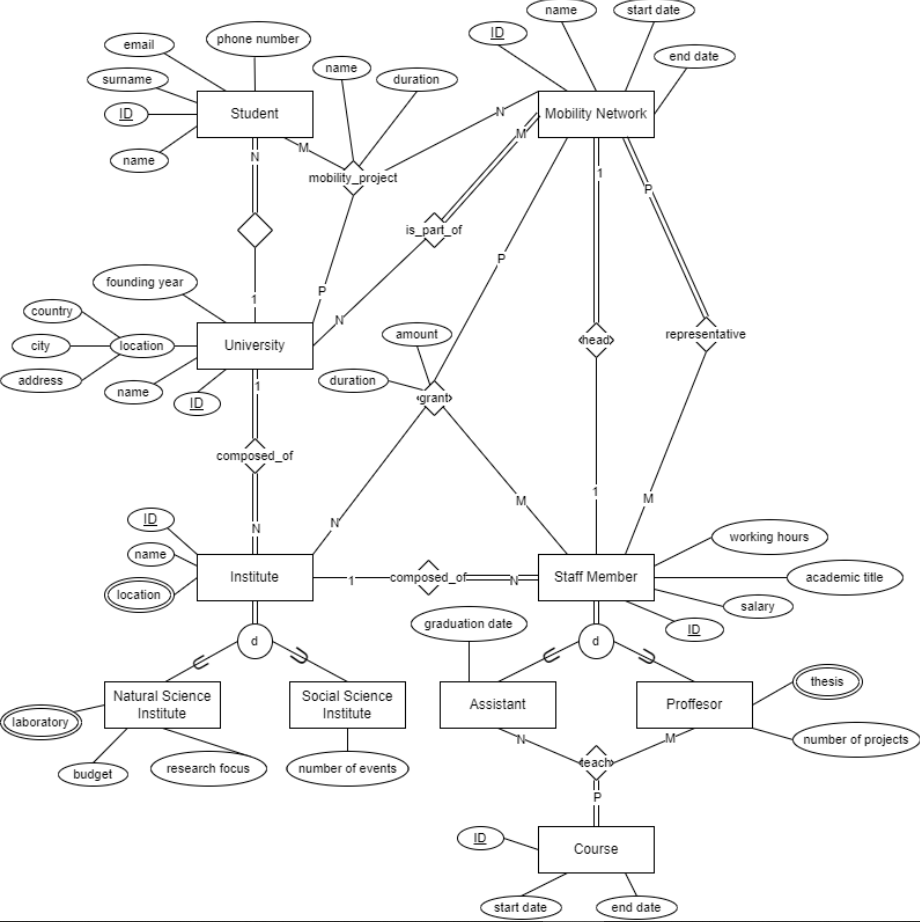  

<span style="font-size: 0.9375rem; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial, 'Noto Sans', 'Liberation Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';">Релационата база е дефинирана преку следните релации:</span>

University(<u>id</u>, name, founding\_year, country, city, address)  
Institute(<u>id</u>, name, university\_id\*)  
Institute\_Location(<u>institute\_id</u>\*, <u>location</u>)  
Natural\_Science\_Institute(<u>institute\_id</u>\*, budget, research\_focus)  
NSI\_Laboratory(<u>institute\_id</u>\*, <u>laboratory</u>)  
Social\_Science\_Institute(<u>institute\_id</u>\*, number\_of\_events)  
Staff\_Member(<u>id</u>, academic\_title, salary, working\_hours, institute\_id\*)  
Assistant(<u>sm\_id</u>\*, graduation\_date)  
Professor(<u>sm\_id</u>\*, number\_of\_projects)  
Professor\_Thesis(<u>sm\_id</u>\*, <u>thesis</u>)  
Course(<u>id</u>, start\_date, end\_date)  
Teach(<u>professor\_id</u>\*, <u>assistant\_id</u>\*, <u>course\_id</u>\*)  
Student(<u>id</u>, name, surname, email, phone\_number, university\_id\*)  
Mobility\_Network(<u>id</u>, name, start\_date, end\_date)  
Representative(<u>staff\_id</u>\*, <u>network\_id</u>\*)  
Head(<u>staff\_id</u>\*, <u>network\_id</u>\*)  
Grant(<u>staff\_id</u>\*, <u>network\_id</u>\*, <u>institute\_id</u>\*, amount, duration)  
Part\_of(<u>university\_id</u>\*, <u>network\_id</u>\*)  
Mobility\_Project(<u>network\_id</u>\*, <u>student\_id</u>\*, <u>university\_id</u>\*, name, duration)

Да се напишат DDL изразите за ентитетните множества **Professor**, **Teach**, **Part\_of**, **Course** и **University**, како и за евентуалните релации кои произлегуваат од нив. Дополнително, потребно е да бидат исполнети следните барања:

- **Градот на универзитетите може да биде  „Skopje“, „Shtip“, „Tetovo“, „Bitola“ или „Struga“.**
    
- **Форматот на трудовите (thesis) на професорите мора да започнува со „Abstract:“.**
    
- **Курсевите во базата на податоци мора да имаат почетен датум по (или на) 01.10.2025 и истите да имаат завршен датум заклучно со 15.09.2026.**
    
- **Доколку се избрише некој курс од базата на податоци, информациите за неговиот наставен кадар (teach) треба да останат зачувани како наставен кадар на непознат (предефиниран) курс.**
    
- **Доколку се избрише некој професор од базата на податоци, неговите трудови (thesis) треба да останат зачувани како трудови на непознат (предефиниран) професор.**

**Забелешка**<span style="font-size: 0.9375rem; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial, 'Noto Sans', 'Liberation Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';">: Табелите и атрибутите потребно е да ги креирате со </span> **ИСТИТЕ ИМИЊА и ИСТИОТ РЕДОСЛЕД** <span style="font-size: 0.9375rem; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial, 'Noto Sans', 'Liberation Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';"> како што е дадено во релациониот модел. За клучевите користете го податочниот тип INTEGER. За надворешните клучеви за кои не е наведено ограничување за референцијален интегритет се претпоставува каскадно бришење/промена. Доколку за некој надворешен клуч ограничите поставување на предефинирана вредност, истата поставете ја на -1.</span>

In [ ]:
CREATE TABLE Professor(
    sm_id INTEGER PRIMARY KEY,
    number_of_projects INT,
    
    FOREIGN KEY(sm_id) REFERENCES Staff_Member(id)
    ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE Professor_Thesis(
    sm_id INT DEFAULT -1, 
    thesis TEXT,
    
    CONSTRAINT pk_check PRIMARY KEY(sm_id, thesis),
    
    FOREIGN KEY(sm_id) REFERENCES Professor(sm_id) 
    ON DELETE SET DEFAULT ON UPDATE CASCADE,
    
    CHECK (thesis LIKE 'Abstract%')
);


CREATE TABLE Part_of(
    university_id INTEGER,
    network_id INTEGER,
    
    CONSTRAINT pk_check PRIMARY KEY(university_id, network_id),
    
    CONSTRAINT FK_UNI FOREIGN KEY(university_id) REFERENCES University(id) ON DELETE CASCADE ON UPDATE CASCADE,
    CONSTRAINT FK_NETWORK FOREIGN KEY(network_id) REFERENCES Mobility_Network(id) ON DELETE CASCADE ON UPDATE CASCADE
);


CREATE TABLE Course(
    id INTEGER PRIMARY KEY,
    start_date TEXT,
    end_date TEXT,
    
    CHECK (start_date LIKE '%2025%10%10%' OR end_date LIKE '%2026%06%15%')
);

CREATE TABLE Teach(
    professor_id INTEGER DEFAULT -1,
    assistant_id INTEGER DEFAULT -1,
    course_id INTEGER DEFAULT -1,
    
    CONSTRAINT pk_check PRIMARY KEY(professor_id, assistant_id, course_id),
    
    FOREIGN KEY(professor_id) REFERENCES Professor(sm_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY(assistant_id) REFERENCES Assistant(sm_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY(course_id) REFERENCES Course(id) ON DELETE SET DEFAULT ON UPDATE CASCADE
);

CREATE TABLE University(
    id INTEGER PRIMARY KEY,
    name TEXT,
    founding_year INT, 
    country TEXT,
    city TEXT,
    address TEXT,
    
    CHECK (city in ('Skopje', 'Shtip', 'Tetovo', 'Bitola', 'Struga'))
);

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with Professor
INSERT INTO Professor VALUES (1, 5);
SELECT * FROM Professor;
```
 | 
```
sm_id       number_of_projects
----------  ------------------
1           5
```
 | 
```
sm_id       number_of_projects
----------  ------------------
1           5
```
 |    |
|    | 
```
-- Testing with Teach
INSERT INTO Teach VALUES (1, 2, 100);
SELECT * FROM Teach;
```
 | 
```
professor_id  assistant_id  course_id
------------  ------------  ----------
1             2             100
```
 | 
```
professor_id  assistant_id  course_id
------------  ------------  ----------
1             2             100
```
 |    |
|    | 
```
-- Testing with Professor_Thesis
INSERT INTO Professor_Thesis VALUES (1, 'Abstract: Cloud-Based Data Processing Systems');
SELECT * FROM Professor_Thesis;
```
 | 
```
sm_id       thesis
----------  ---------------------------------------------
1           Abstract: Cloud-Based Data Processing Systems
```
 | 
```
sm_id       thesis
----------  ---------------------------------------------
1           Abstract: Cloud-Based Data Processing Systems
```
 |    |
|    | 
```
-- Testing with Part_of
INSERT INTO Part_of VALUES (1, 5);
SELECT * FROM Part_of;
```
 | 
```
university_id  network_id
-------------  ----------
1              5
```
 | 
```
university_id  network_id
-------------  ----------
1              5
```
 |    |
|    | 
```
-- Testing with Course
INSERT INTO Course VALUES (100, '2025-10-10', '2026-06-15');
SELECT * FROM Course;
```
 | 
```
id          start_date  end_date
----------  ----------  ----------
100         2025-10-10  2026-06-15
```
 | 
```
id          start_date  end_date
----------  ----------  ----------
100         2025-10-10  2026-06-15
```
 |    |
|    | 
```
-- Testing with University
INSERT INTO University VALUES (1, 'University of Skopje', 1949, 'North Macedonia', 'Skopje', 'Goce Delcev 9');
SELECT * FROM University;
```
 | 
```
id          name                  founding_year  country          city        address
----------  --------------------  -------------  ---------------  ----------  -------------
1           University of Skopje  1949           North Macedonia  Skopje      Goce Delcev 9
```
 | 
```
id          name                  founding_year  country          city        address
----------  --------------------  -------------  ---------------  ----------  -------------
1           University of Skopje  1949           North Macedonia  Skopje      Goce Delcev 9
```
 |    |